# Makine Öğrenmesi Projesi 1: Regresyon Analizi

Makine öğrenmesine başlamadan evvel veri analizi için temel kütüphaneler olan **Numpy**, **Pandas**, **Matplotlib** ve **Seaborn** kütüphanelerini projemize import ederek işe başlayacağız.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Numpy**: Adı, *Numerical Python*'un kısaltmasından gelir. Birtakım ileri matematiksel işlemlerin daha iyi yapılabilmesi için geliştirilmiştir.

**Pandas**: Numpy temelli bir kütüphanedir. Veri analizi yapılırken sıklıkla kullanılan *Series* ve *DataFrame* yapılarını barındırır. Çeşitli formatlarda gelen veri dosyalarını *DataFrame* yapısına çevirerek veriler üzerinde işlem yapmamızı kolaylaştırır.

**Matplotlib**: Veri görselleştirme için kullanılan temel kütüphanelerden biridir.

**Seaborn**: Matplotlib'in üzerine inşa edilmiş ve matplotlibden daha iyi grafikler oluşturmamızı sağlayan bir veri görseleştirme kütüphanesidir.

In [21]:
# Verinin getirilmesi
california_housing_data = pd.read_csv("california_housing.csv")

**Veri setinin kaynağı**

[ https://www.kaggle.com/datasets/camnugent/california-housing-prices ]

**Veri Setinin Yapısı**
Veriler Kaliforniya eyaletinin belli bir bölgesine ait evler ve bu bölgeye dair 1990 yılında yapılan nüfus sayımına yönelik bilgiler içermektedir.

**Verinin Değişkenleri**

- longitude: Boylam

- latitude: Enlem

- housing_median_age: Evin Ortalama Yaşı

- total_rooms: Toplam Oda Sayısı

- total_bedrooms: Toplam Yatak Odası Sayısı

- population: Nüfus

- median_income: Nüfusun Ortalama Geliri

- median_house_value: Ortalama Konut Değeri

- ocean_proximity: Okyanusa Olan Mesafe

Veri setinin orijinal yapısını kazara bozmamak adına veri setinin bir kopyasını çıkarıyoruz ve bundan sonra elimizdeki bu kopya ile işlem yapacağız.

In [22]:
#Veri Setinin kopyasını almak
df = california_housing_data.copy()

## Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)

Keşifsel veri analizi, veriyi görsel ve nümerik yöntemlerle veri ön işleme öncesi analiz etmedir. Veri hakkında bilgi sahip olmamızı ve makine öğrenmesine geçmeden önce veriyi nasıl bir stratejiyle işleyeceğimize dair bir fikir elde etmemizi sağlar.

### Nümerik Keşifsel Veri Analizi (Numerical EDA)

Veriyi sayısal olarak özetleme yaklaşımıdır.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


*df.info()* komutu ile verinin değişkenleri, bu değişkenlerin sayılarını, verideki değer sayısını, değişkenlerin veri türünü (dtype), verinin hangi değişkenlerinde ne kadar eksik değer olduğunu öğrenmemizi sağlar.

Görüleceği gibi veri setimizde -bir tanesi kategorik, geri kalanı ondalıklı sayı olmak üzere- on tane değişken ve yirmi bin altı yüz kırk adet değer vardır. Görüldüğü gibi bu değerlerin bazıları eksiktir. Fakat eksik olan değerler tek bir değişkende ve veri setindeki toplam değer sayısının yaklaşık yüzde biri olduğu için bu değerleri veri ön işlemede veri setimizden çıkaracağız.

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


*df.describe().T* kodu bize veri setine ait temel istatistik değerlerini gösterir. Sondaki T harfi *Transpoze* işlemini temsil eder ve tabloyu daha okunaklı hale getirmek için konulur.

- count: Her bir değişkene ait toplam değer sayısı

- mean: Her bir değişkenin kendine ait ortalamaları

- std: Her bir değişkenin kendine ait standart sapması

- min: O değişkendeki en küçük değer

- max: O değişkendeki en büyük değer

- %25, %50, %75: Değişkenin çeyreklik değerleri

Veri setinin değerlerine kısa bir göz atmak için *heads()* ve *tails()* işleminden faydalanırız

- head(): Veri setinin başını gösterir. Kendisine parametre girilmediği müddetçe veri setinin ilk beş değerini gösterecektir.

- tail(): Veri setinin sonunu gösterir. Kendisine parametre girilmediği müddetçe veri setinin son beş değerini gösterecektir.

In [25]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


Görsel keşifsel veri analizine geçmeden önce, veri setindeki boş değerleri atarak veri setinin temel istatistik değerlerine tekrar bakalım. *df.dropna()* komutu veri setindeki boş değerleri kaldırır.

In [27]:
# Veri setinden boş değerleri atma
df = df.dropna()

In [28]:
#temel istatistik değerleri
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
median_house_value,20433.0,206864.413155,115435.667099,14999.0000,119500.0000,179700.0000,264700.000,500001.0000


*df.dropna()* komutunu tekrar df değişkenine atamamın sebebi bundan sonra boşluksuz veri setini kullanacak olmamızdandır. Bunun yerine metot içine **inplace=True** yazarak da değşikliği kalıcı hale getirebilirsiniz ama ileride olası bir hata olması durumunda veri setini eskisi gibi kullanabilmek için bütün programı baştan başlatmanız gerekir.

### Görsel Keşifsel Veri Analizi(Visual EDA)

Bir takım grafiklerile veriyi özetleme yaklaşımıdır.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

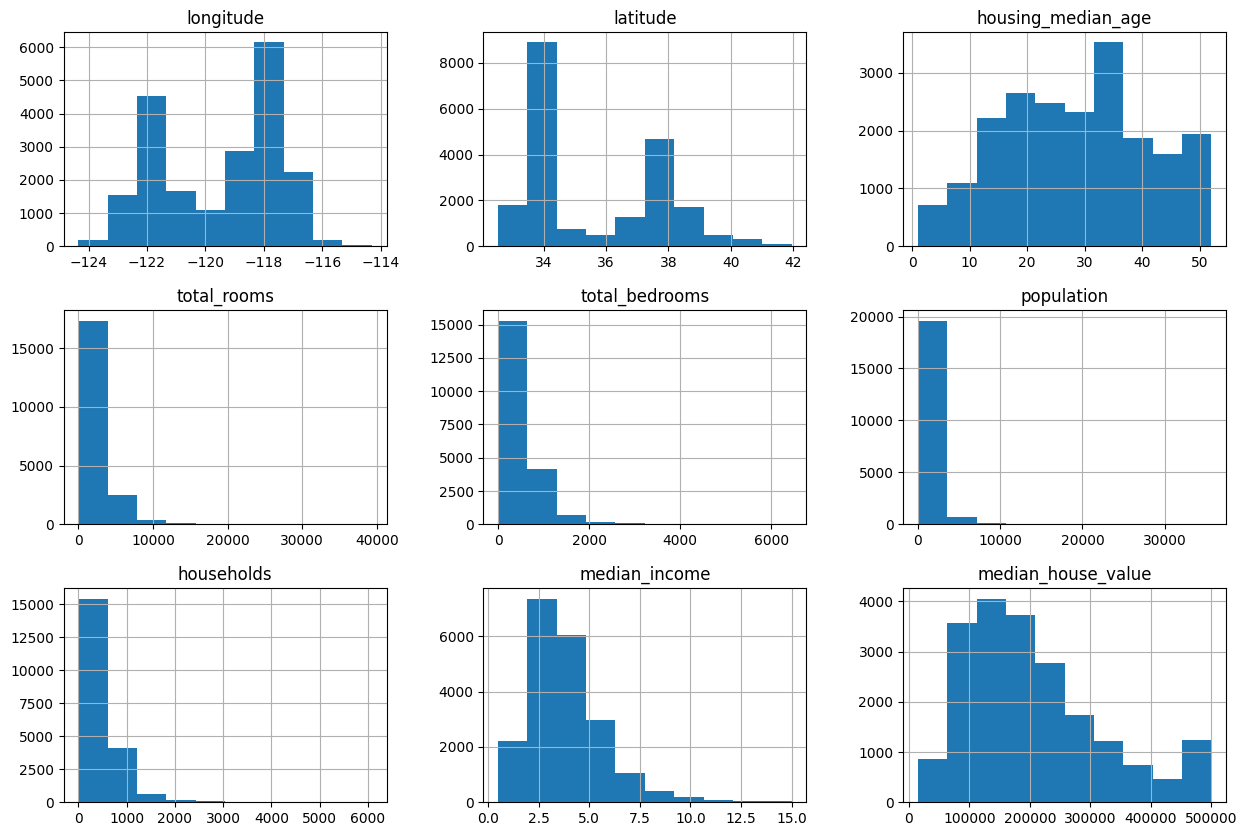

In [29]:
df.hist(figsize=(15, 10))

*df.hist()* komutu bize verinin nümerik değişkenlerinin histogram grafiklerini verir. figsize=(15, 10) argümanı oluşacak histogramlar grafiğinin boyutunu belirlememize yardımcı olur.

<Axes: >

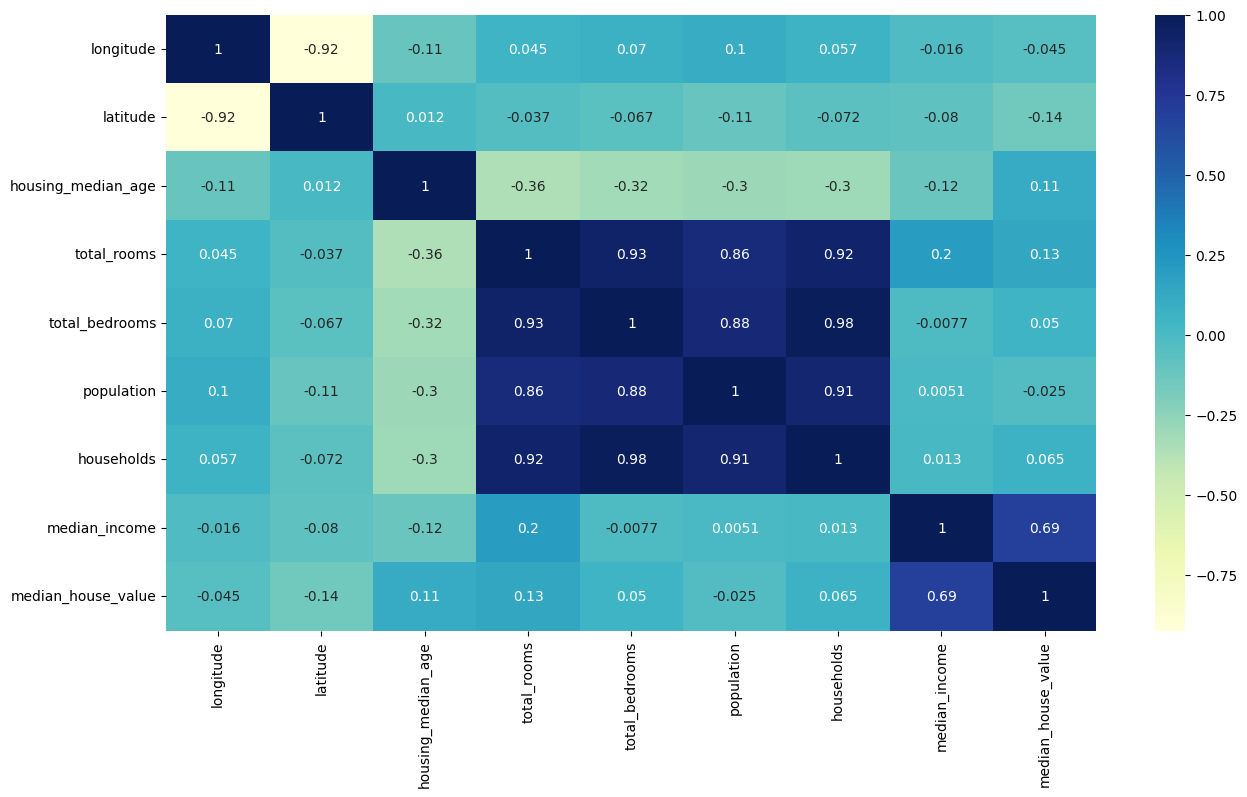

In [30]:
plt.figure(figsize=(15,8))# Grafik Boyutu
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")

Burada seaborn kütüphanesinden faydalanarak nümerik veriler arasındaki korelasyon durumunu öğrenmek için bir ısı haritası oluşturdum.

**annot=True** ifadesiyle ısı haritasındaki her bir verinin birbirleriyle olan korelasyon katsayısını ilgili bölgenin üzerine yazmasını sağladım.

**cmap** parametresi ise ısı haritasının renk setini belirlememizde yardımcı oldu.

### Veri Ön İşleme

Artık ham veri ile ilgili yeterince bilgi sahibi olduktan sonra makine öğrenmesi için model oluşturmadan evvel geriye veriyi işlemek kaldı.

Bu durumda yapacağımız ilk işlem histogram grafiğindeki bazı değişkenleri normal dağılıma yaklaştırmak olacak.

In [31]:
df["total_rooms"] = np.log(df["total_rooms"] + 1)
df["total_bedrooms"] = np.log(df["total_bedrooms"] + 1)
df["population"] = np.log(df["population"] + 1)
df["households"] = np.log(df["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

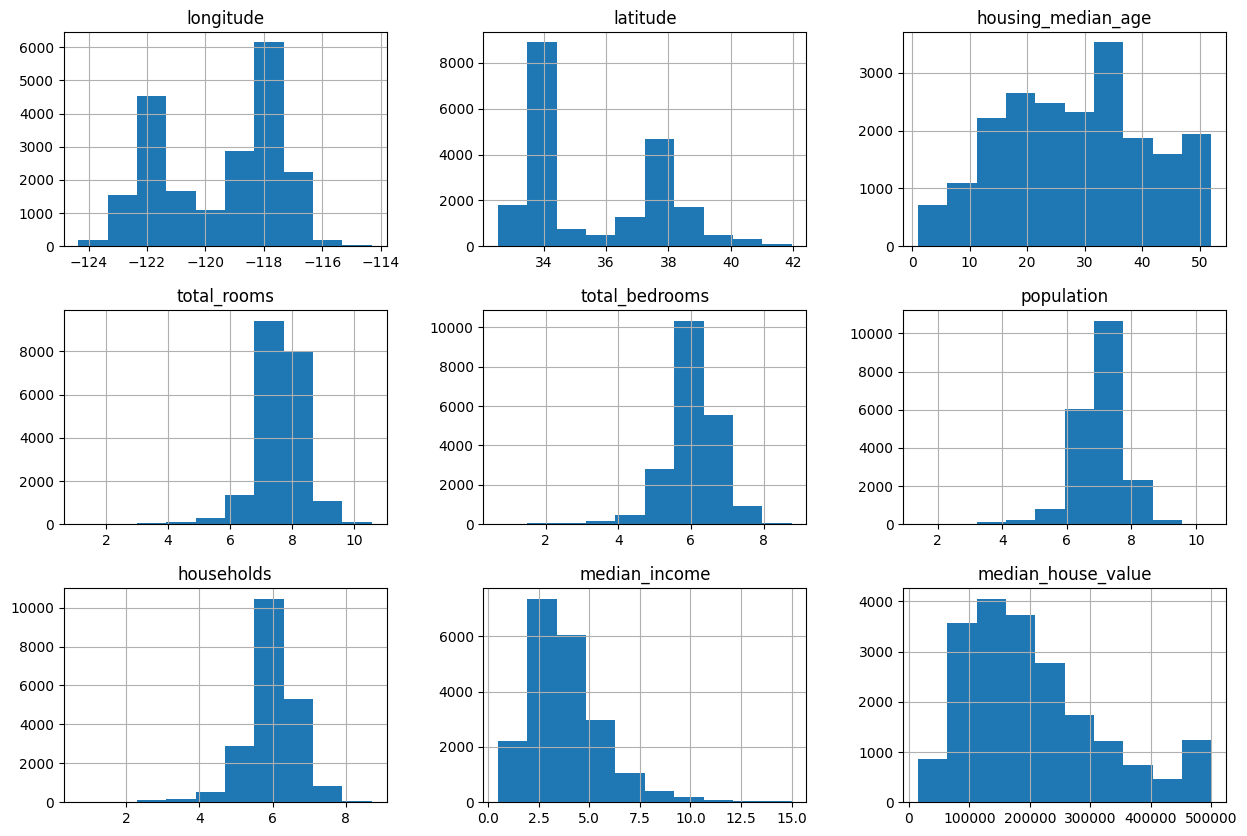

In [32]:
df.hist(figsize=(15, 10))

Şimdi yapacağımız işlem kategorik değişkenimizin değerlerine bakarak bu değerleri birer değişkene çevirmenin uygun olup olmadığına bakmak.

In [33]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

Kategorik değişkenimizde toplam beş farklı değer var. Bunların her birini birer özelliğe çevirelim. Bu işleme **LabelEncoding** denir.

In [34]:
df = df.join(pd.get_dummies(df.ocean_proximity)).drop(['ocean_proximity'], axis=1)

Her bir değişkenimizin okyanusa olan yakınlığını nümerik olarak belirlediğimiz için **ocean_proximity** adlı değişkene ihtiyacımız kalmadı.

In [35]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,False,False,False,True,False


Şimdi veri ön işlemeden geçmiş veri setimizin ısı haritasını inceleyelim. Bu sefer her bir değişkenin veri setinde nümerik bir karşılığı olduğu için *numeric_only* parametresine müdahale etmemize gerek kalmadı.

<Axes: >

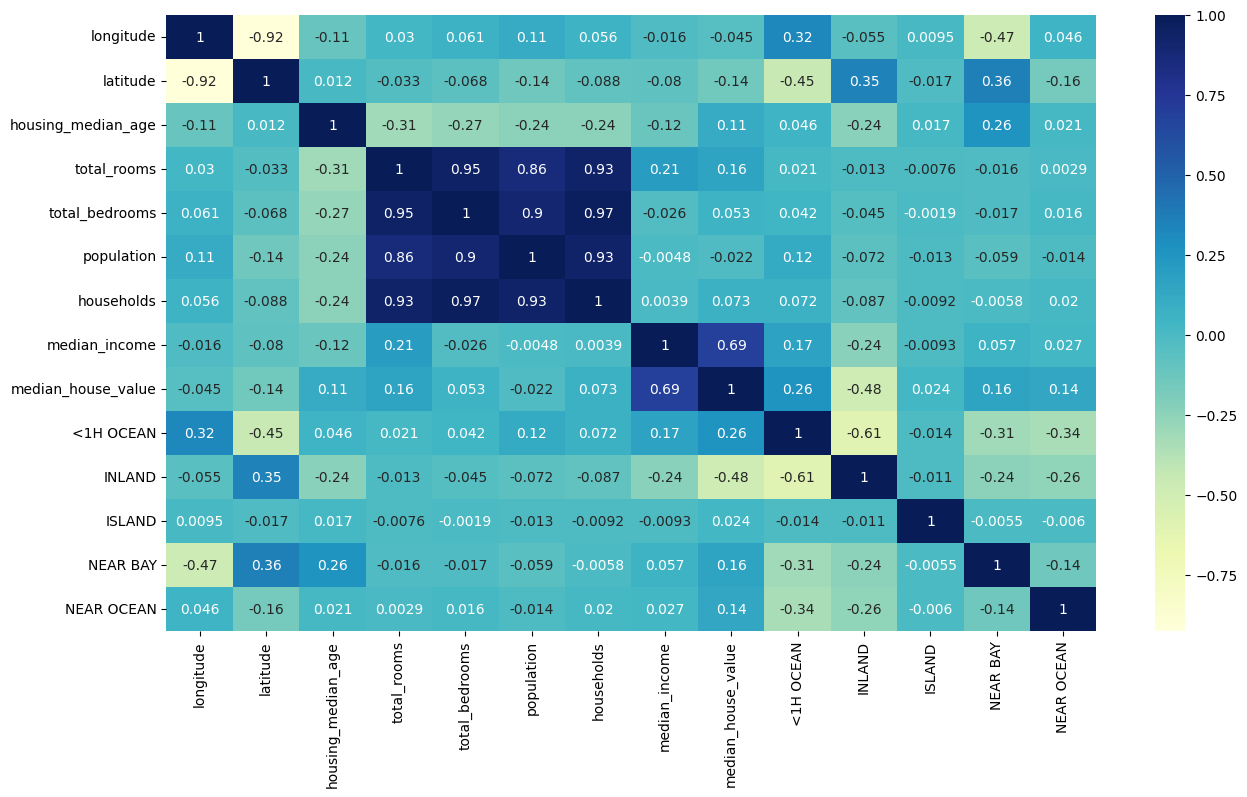

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

Model eğitmeye geçmeden önce verilerin dağılımlarını inceleyelim.

<Axes: xlabel='latitude', ylabel='longitude'>

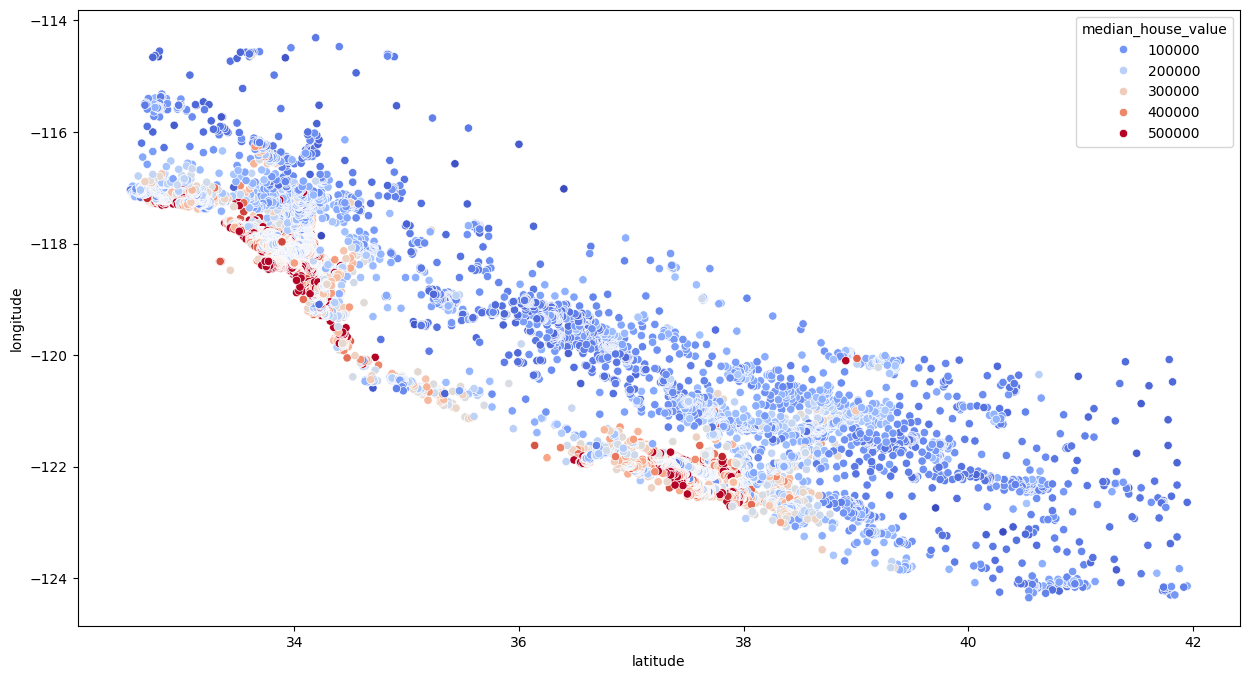

In [37]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=df, hue="median_house_value", palette="coolwarm")

## Makine Öğrenmesi: Model Eğitme ve Performans Karşılaştırmaları

Bu kısımda veri setimize uygun bir makine öğrenmesi modelini seçmek için birkaç modelin performanslarını karşılaştırıp en iyi modeli belirleyeceğiz. Bu iş için **scikit-learn** kütüphanesinde faydalanacağız.


In [38]:
# Veri setini train-test olarak ayırmak için gerekli kütüphane
from sklearn.model_selection import train_test_split

#Karşılaştırılacak modeller
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

#Modellerin performans metriği
from sklearn.metrics import mean_squared_error

Bu projemizde amaç belirli özelliklerden yararlanarak ortalama ev fiyatlarını tahmin etmek.


Modellerimizi eğitmeden evvel veri setimizi eğitim(train) ve test setlerine ayırmalıyız.

In [40]:
feature_names = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                 'population', 'households', 'median_income', '<1H OCEAN',
                 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
target_name = ['median_house_value']

X = df.loc[:, feature_names]
y = df.loc[:, target_name]

In [51]:
#yüzde 70 train veri seti, yüzde 30 test veri seti
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}


for name, model in models.items():

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)

    print(f"{name} MSE: {mse}")

Linear Regression MSE: 4529922273.631617
Decision Tree Regression MSE: 7200086666.474877


<ipython-input-52-071419b458e0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest Regression MSE: 3759404179.9399905


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Regression MSE: 13941471826.669731


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regression MSE: 3971413513.9115925


Sonuçlar şu şekilde:

- Linear Regression MSE: 4529922273.631617
- Decision Tree Regression MSE: 7200086666.474877
- Random Forest Regression MSE: 3759404179.9399905
- Support Vector Regression MSE: 13941471826.669731
- Gradient Boosting Regression MSE: 3971413513.9115925

Bu sonuçlardan anlaşılacağı üzere RandomForestRegression veri setinde en iyi performansı göstermiştir.

RandomForestRegressor, veri kümesinin çeşitli alt örneklerine bir dizi karar ağacı regresörüne uyan ve tahmin doğruluğunu geliştirmek ve 'overfitting' durumunu kontrol etmek için ortalamayı kullanan bir regresyon modelidir.

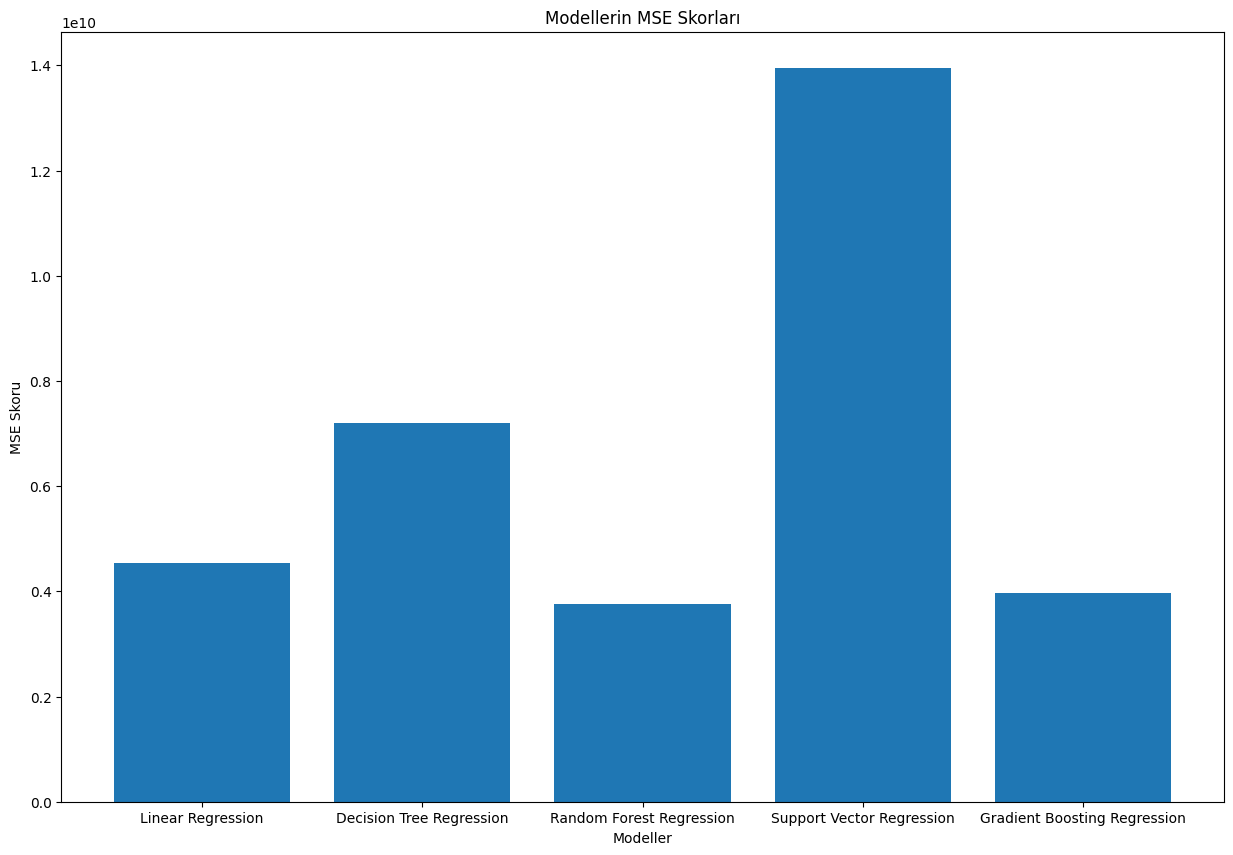

In [53]:
model_names = ["Linear Regression", "Decision Tree Regression",
               "Random Forest Regression", "Support Vector Regression",
               "Gradient Boosting Regression"]
mse_scores = [4529922273.631617, 7200086666.474877,
              3759404179.9399905, 13941471826.669731,
              3971413513.9115925]

plt.figure(figsize=(15,10))
plt.bar(model_names, mse_scores)
plt.xlabel('Modeller')
plt.ylabel('MSE Skoru')
plt.title('Modellerin MSE Skorları')
plt.show()

## Makine Öğrenmesi: Hiperparametre Optimizasyonu

Eğittiğimiz modeller arasında en iyi performans gösteren modeli seçtikten sonra hiperparametre optimizasyonu kullanarak modelimizin en iyi performans gösterdiği parametreleri bulacağız. Kullanacağımız yöntem RandomizedSearch.
RandomizedSearchCV'de, GridSearchCV'nin aksine, tüm parametre değerleri denenmez, bunun yerine belirtilen dağılımlardan sabit sayıda parametre ayarı örneklenir.

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
model = RandomForestRegressor()


param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}


random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=5, scoring='neg_mean_squared_error', n_iter=50, random_state=42)


In [49]:
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [50]:
#En iyi parametreler
best_params = random_search.best_params_

# En iyi Model
best_model = random_search.best_estimator_

#En iyi model ile tahmin
y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)

print(f"Random Forest Regressor MSE with optimized parameters: {mse}")

Random Forest Regressor MSE with optimized parameters: 4488748035.171673
